# AIPI 590 - XAI | Assignment #04
### PDP, ICE And ALE plots
### Shaunak Badani


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/shaunak-badani/XAI/blob/main/Assignment04/ExplainableTechniquesII.ipynb)

> In this notebook we outline the Partial Dependence plots (PDP), Individual Conditional Explanation (ICE) plots and the Accumulated Local Effects plot.

In [37]:
## Imports
from sklearn.datasets import fetch_species_distributions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Exploratory Data Analysis

In [2]:
species = fetch_species_distributions()

In [3]:

species['train']['species'].size

1624

In [4]:
species['train']['dd lat'].size
species['train']['dd long'].size

1624

In [5]:
dd_lat = species['train']['dd lat']
dd_long = species['train']['dd long']
labels = species['train']['species']

In [6]:
def simplify_species(specie):
  if "bradypus_variegatus" in specie:
    return "bradypus_variegatus"
  return "microryzomys_minutus"

In [7]:
np.apply_along_axis(simplify_species, 0, np.char.decode(labels))

species_unique = []
for specie in np.char.decode(labels):
  species_unique.append(simplify_species(specie))
species_unique = np.array(species_unique)

In [8]:
unique_labels = np.unique(species_unique)
idxs = {}

for i, ul in enumerate(unique_labels):
  idxs[ul] = i

Text(0, 0.5, 'Longitude (in degrees)')

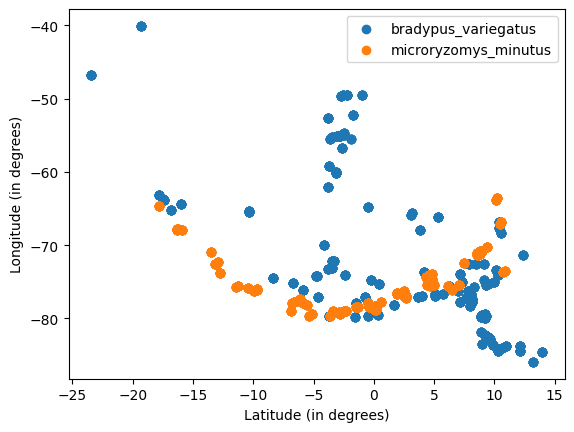

In [9]:
for ul in unique_labels:
  indices = (species_unique == ul)
  plt.scatter(dd_lat[indices], dd_long[indices], label = ul)
plt.legend()

plt.xlabel('Latitude (in degrees)')
plt.ylabel('Longitude (in degrees)')


In [35]:
X = pd.DataFrame({'dd_lat': dd_lat, 'dd_long': dd_long, 'species': species_unique})
X = X.replace({'microryzomys_minutus': 0, 'bradypus_variegatus': 1})

<ipython-input-35-8b25e3164905>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X = X.replace({'microryzomys_minutus': 0, 'bradypus_variegatus': 1})


<Axes: >

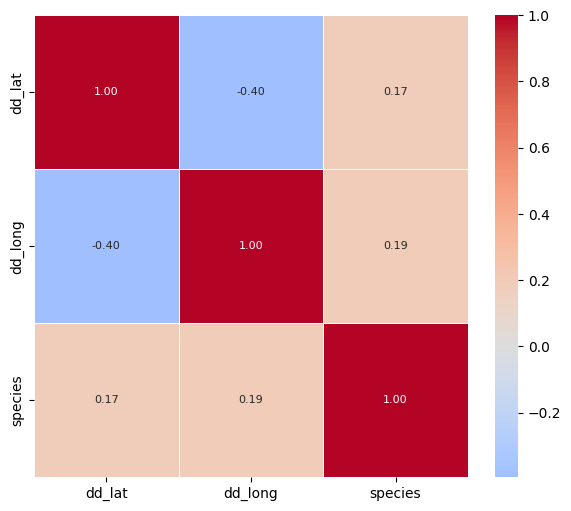

In [39]:
# Calculate correlation matrix
corr_matrix = X.corr()

#create the figure
plt.figure(figsize=(7, 6))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", annot_kws={"size": 8}, cmap='coolwarm', center=0, linewidths=0.5)

Interpretation: The features are not too correlated. The most correlation is of the latitude with the longitude, with a value of -0.40

# Partial Dependence Plots

In [40]:
X_train = X[['dd_lat', 'dd_long']].to_numpy()
y_train = X['species']
y_train = y_train.to_numpy()


In [41]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,

    max_depth=1, random_state=0).fit(X_train, y_train)

Text(0.5, 1.0, 'Partial dependence of gradient boosting model with dd_lat and dd_long')

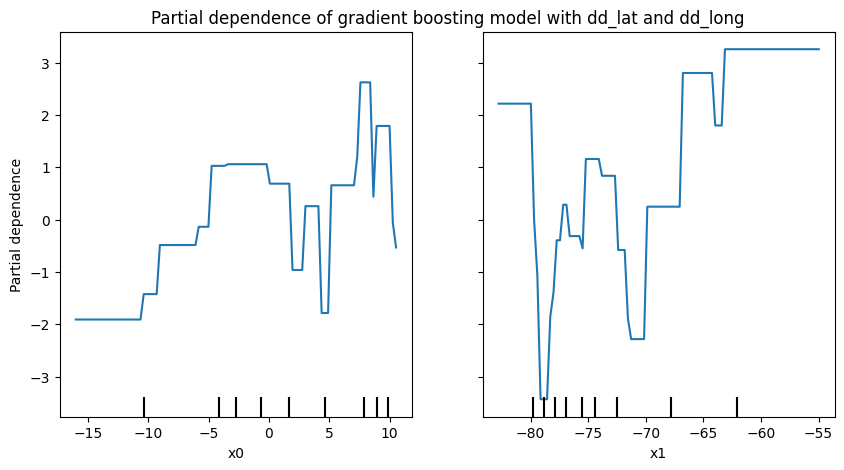

In [42]:
fig, ax = plt.subplots(figsize = (10, 5))
PartialDependenceDisplay.from_estimator(clf, X_train, [0, 1], ax = ax)
ax.set_title("Partial dependence of gradient boosting model with dd_lat and dd_long")

Interpretation:
- For the latitude feature, the outcome of the species migrates from 0 to 1 as the value increases from -15 to -2, and then oscillates back and forth - from 1 and 0 back to 1 as the value increases to 12.

- For the longitude feature, the outcome of the species migrates to 0 (microryzomys_minutus) as it increases from -90 to -88, then deviates towards 1 (bradypus_variegatus) from -88 to -75, then dips again.

## Individual Conditional Expectation plot

Text(0.5, 1.0, 'Individual conditional expectation (ICE) plot of gradient boosting model with dd_lat and dd_long')

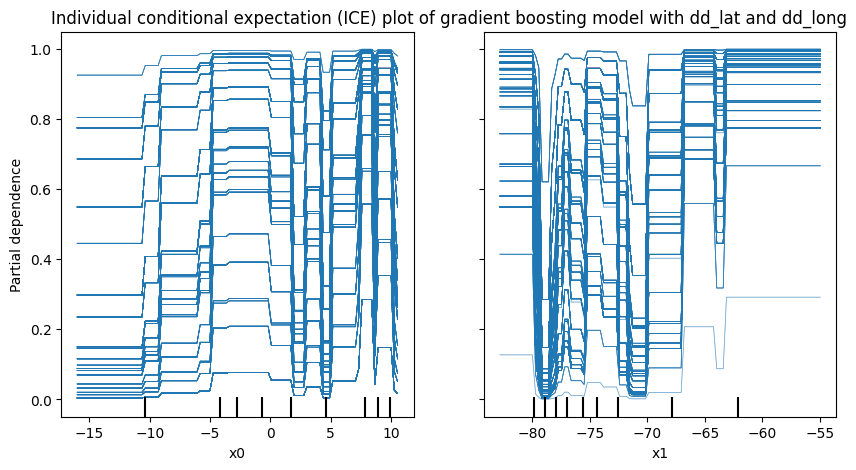

In [43]:
fig, ax = plt.subplots(figsize = (10, 5))
PartialDependenceDisplay.from_estimator(clf, X_train, [0, 1], ax = ax, kind = 'individual')
ax.set_title("Individual conditional expectation (ICE) plot of gradient boosting model with dd_lat and dd_long")

Plotting both ICE and PDP plots on the same plot:

Text(0.5, 1.0, 'Individual conditional expectation (ICE) plot of gradient boosting model with dd_lat and dd_long')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


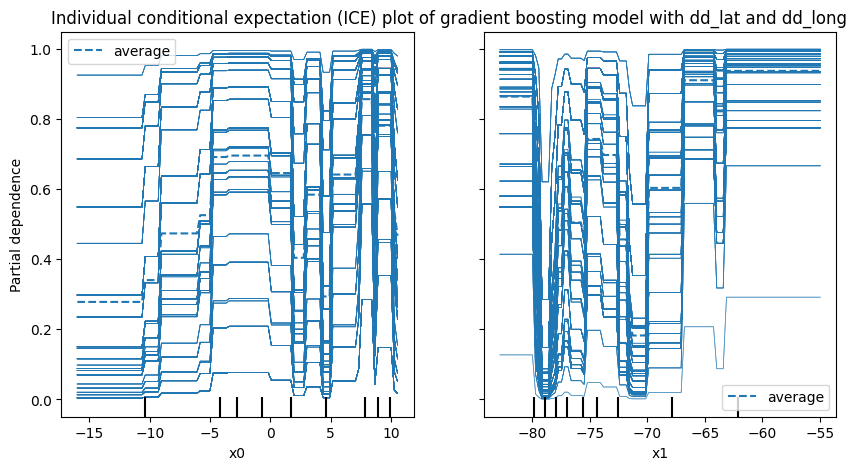

In [44]:
fig, ax = plt.subplots(figsize = (10, 5))
PartialDependenceDisplay.from_estimator(clf, X_train, [0, 1], ax = ax, kind = 'both')
ax.set_title("Individual conditional expectation (ICE) plot of gradient boosting model with dd_lat and dd_long")

Interpretation:

- The ICE plot shows the partial dependence of the feature for each sample with perturbation, unlike a PDP plot, which just shows the average.

- The trend observed in the ICE plot is pretty much the same for every sample, as was observed in the PDP plot.

- The only difference is that for samples closer to the top (for dd_lat (x0) feature), the slope is slightly smaller than other samples.

## AI Usage

- No AI was used for the code that was written in the notebook. All code has been referred from blog posts or github repositories.